# **Conjunto de dados - Spotify**

### O que será visto neste notebook:
- Aprofundamento nas colunas da base
- Visualizações para detecção de correlações entre colunas
- Criação de clusters
- Nuvem de palavras baseada nos clusters
- colunas-chave para geração de insights


**Link da base:** https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset

In [2]:
# Bibliotecas
import pandas as pd                                   # Pandas
import numpy as np                                    # Numpy
import seaborn as sns                                 # Seaborn
import matplotlib.pyplot as plt                       # Matplotlib
from sklearn.cluster import KMeans                    # KMeans
from wordcloud import WordCloud                       # WordCloud

### Analisando informações da base

In [3]:
# Importando a base
base = pd.read_csv('data/data.csv')

In [4]:
# Visualizando informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
# Visualizando dados estatísticos das colunas numéricas
base.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [6]:
# Quantidade de valores únicos das colunas
base.nunique().sort_values(ascending=False)

id                  170653
name                133638
tempo                84694
duration_ms          51755
artists              34088
loudness             25410
release_date         11244
instrumentalness      5401
acousticness          4689
energy                2332
liveness              1740
valence               1733
speechiness           1626
danceability          1240
year                   100
popularity             100
key                     12
explicit                 2
mode                     2
dtype: int64

In [7]:
# Valores nulos por coluna
base.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [8]:
# Vendo se a base contém valores duplicados
base.duplicated().sum()

0

In [9]:
# Printando a quantidade de linhas e colunas da base
print(f'Tamanho da base "base" | Linhas: {base.shape[0]} --- Colunas: {base.shape[1]}')

Tamanho da base "base" | Linhas: 170653 --- Colunas: 19


**Acousticness**: Classifica se a música é acústica ou não, vai de 0.0 a 1.0, músicas com o valor de Acousticness mais próximo de 1.0 possuem alta certeza que sejam acústicas.

**Danceability**: Classifica o quão dançante é a música com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral, vai de 0.0 a 1.0, valores de Danceability mais próximos de 0,0 significam que a música é menos dançante e maís próximo de 1,0 significa que a música é mais dançante.

**Energy**: Representa uma medida para avaliação da intensidade e atividade da música, normalmente as músicas mais energéticas parecem rápidas, altas e barulhentas, vai de 0.0 a 1.0, valores de Energy mais próximos de 0,0 significam que a música é mais calma, por exemplo musicas clássicas e valores maís próximo de 1,0 significa que a música é mais agitada, por exemplo Death Metal.

**Instrumentalness**: Classifica o quanto "instrumental" é a música, músicas totalmente instrumentais não possuem vocais, vocais como “Ooh” e “aah” são tratados como instrumentais neste contexto. O rap , récitas ou declamações são claramente “vocais”. Quanto mais próximo o valor de Instrumentalness estiver de 1,0, maior será a certeza de que a música é instrumental (não contem conteúdo vocal).

**Liveness**: Classifica a presença de público na gravação na música. Valores mais altos representam um aumento na certeza da gravação da música ser "ao vivo". Valores acima de 0,8 fornece uma grande certeza de que a música tenha sido gravada "ao vivo".

**Loudness**: O volume geral de uma música em decibéis (dB). Os valores de intensidade são calculados em toda a música e são úteis para comparar a intensidade relativa das músicas. Loudness é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

**Speechiness**: A Speechiness detecta a presença de palavras faladas em uma música. Quanto mais exclusivamente falada for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem músicas que provavelmente são compostas inteiramente de Speechiness faladas. Valores entre 0,33 e 0,66 descrevem músicas que podem conter instrumentos e fala, em seções ou em camadas, incluindo casos como música rap.

**Tempo**: O tempo estimado geral de uma música em batidas por minuto (BPM). Na terminologia musical, o tempo é a velocidade ou ritmo de uma determinada parte e deriva diretamente da duração média do tempo.

**Valence**: Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma música. Musicas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórico), enquanto músicas com baixa valência soam mais negativas (por exemplo, triste, deprimido, irritado).


**FONTE:**

In [10]:
# Visualizando as 5 primeiras linhas da base
base.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [11]:
# Visualizando os nomes de artistas que mais aparecem na base
base.artists.value_counts()

['Эрнест Хемингуэй']                                  1211
['Эрих Мария Ремарк']                                 1068
['Francisco Canaro']                                   942
['Frank Sinatra']                                      630
['Ignacio Corsini']                                    628
                                                      ... 
['Francisco Canaro', 'Ernesto Fama', 'Ada Falcón']       1
['Kings (MHM)']                                          1
['Daddy Yankee', 'Prince Royce']                         1
['Flume', 'T-Shirt']                                     1
['KEVVO', 'J Balvin']                                    1
Name: artists, Length: 34088, dtype: int64

## **Analisando algumas colunas agrupadas pela key**
- Plotando gráficos das colunas, agrupadas pelos valores da coluna "key"

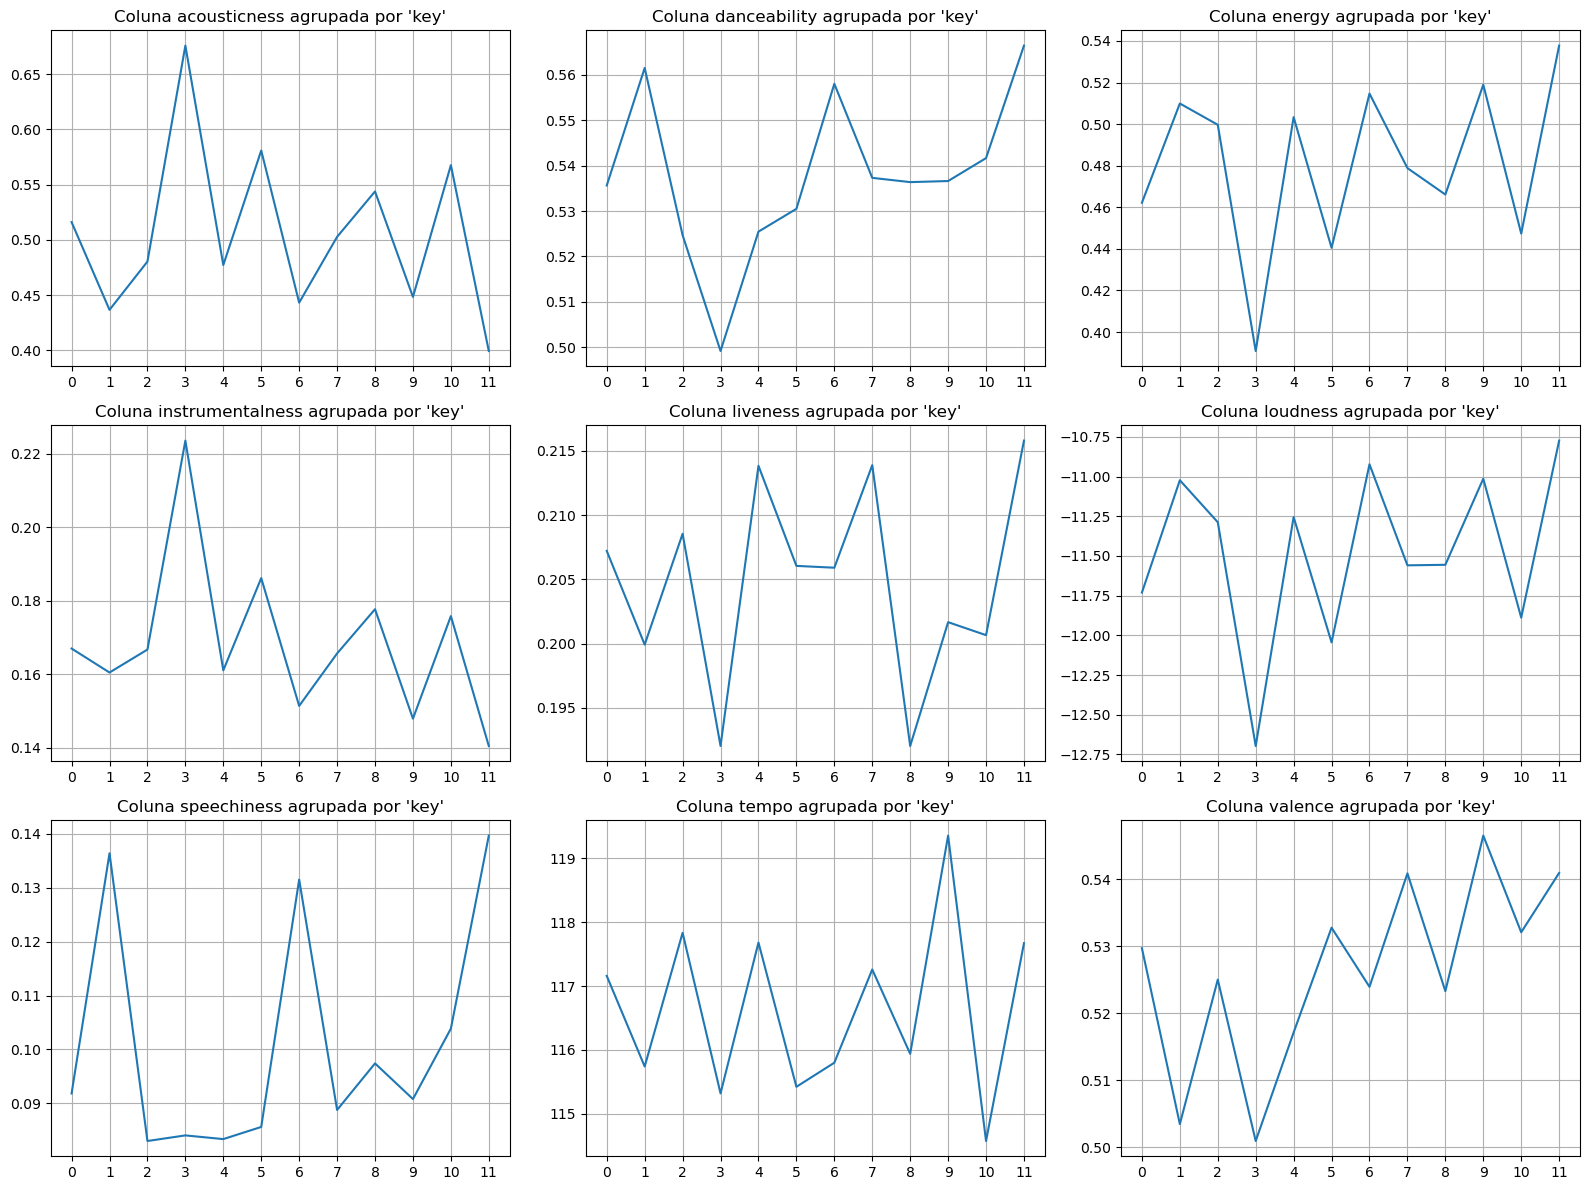

In [12]:
colunas = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']

#a = base.groupby('key')['energy'].mean()
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(16,12), tight_layout=True)

for ax,col in zip(axes.flatten(), colunas):
    a = base.groupby('key')[col].mean()
    ax.plot(a.index, a.values, axes=ax)
    ax.set_xticks(range(0,12))
    ax.set_title(f"Coluna {col} agrupada por 'key'")
    ax.grid()
plt.show()

**Abaixo**: Gráficos de caixa para das colunas, baseada na coluna "key"

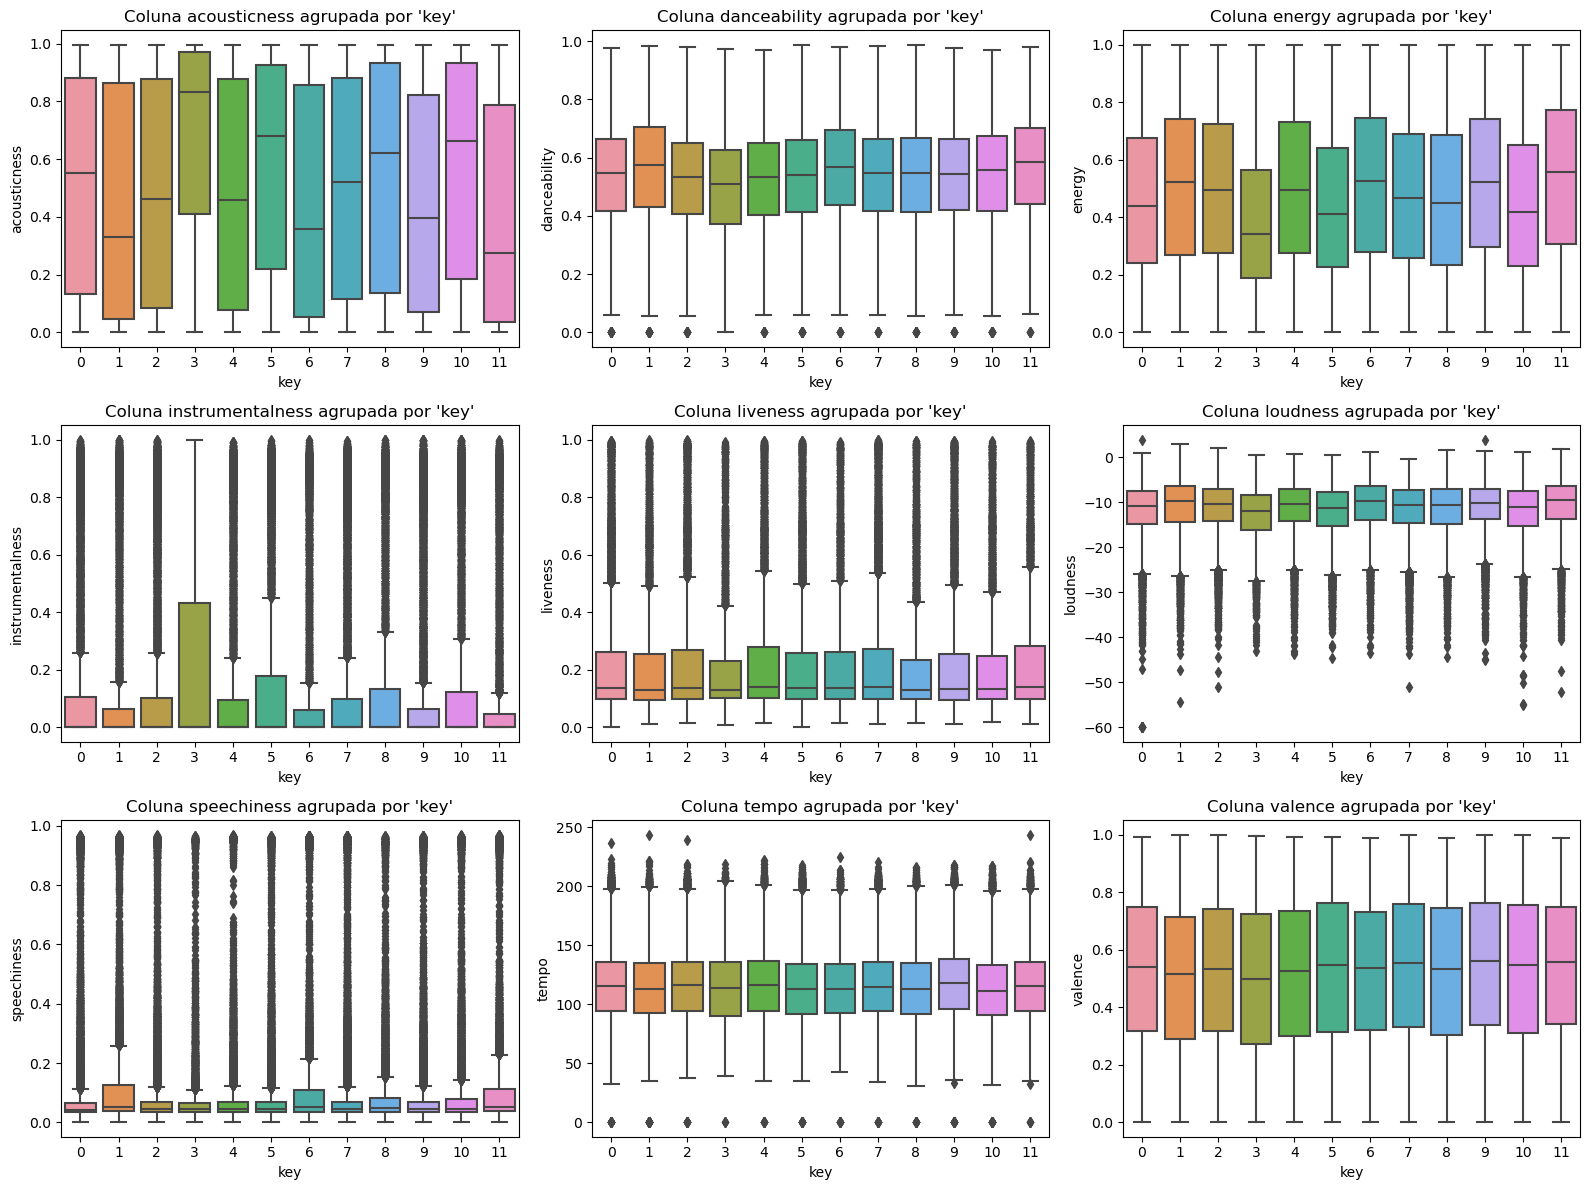

In [13]:
colunas = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']

fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(16,12), tight_layout=True)

for ax,col in zip(axes.flatten(), colunas):
    a = base.groupby('key')[col].value_counts()
    sns.boxplot(data=base,x='key',y=col, ax=ax)
    ax.set_title(f"Coluna {col} agrupada por 'key'")
plt.show()

### **Analisando a coluna de acústica**

In [14]:
dados_acousticness = pd.DataFrame(base.groupby('key')['acousticness'].agg(['min','max','mean','median','std','count']))
display(dados_acousticness)

,min,max,mean,median,std,count
key,,,,,,
0,0.000000,0.996,0.516131,0.5525,0.364532,21600
1,0.000000,0.996,0.436717,0.3290,0.386728,12886
2,0.000000,0.996,0.480443,0.4630,0.375903,18823
3,0.000001,0.996,0.675861,0.8330,0.345046,7297
4,0.000001,0.996,0.477278,0.4580,0.378495,12933
5,0.000000,0.996,0.580935,0.6815,0.358443,16430
6,0.000001,0.996,0.443242,0.3570,0.382975,8741
7,0.000000,0.996,0.502782,0.5190,0.369372,20803
8,0.000001,0.996,0.543888,0.6220,0.378621,10751


**Conclusões analisando a base acima:**
- A key 3 possui a maior mediana, com 0.83. A key 11 possui a menor, com 0.27.
- A key 1 é a que mais aparece, em 21600 linhas. A que menos aparece é a key 3, com 7297
- O desvio padrão das keys estão entre 0.33 e 0.39
- Os valores mínimos das keys estão todos proximos de 0, e o valor máximo próximo a 1
- Analisei a mediana devido a isso. Caso uma key tenha muitos valores proximos a 1 e 0, influenciará muito a média. 


**Obs:** Escolhi a coluna "key" como coluna para agrupar, para analisar se haviam diferenças nos valores quando ligadas às outras colunas

.

### **Analisando o quão dançante é a musica "danceability", agrupada pelas keys**

In [15]:
dados_acousticness = pd.DataFrame(base.groupby('key')['danceability'].agg(['min','max','mean','median','std','count']))
display(dados_acousticness)

,min,max,mean,median,std,count
key,,,,,,
0,0.0,0.977,0.535619,0.547,0.171094,21600
1,0.0,0.985,0.561484,0.576,0.188853,12886
2,0.0,0.980,0.524681,0.534,0.173100,18823
3,0.0,0.973,0.499189,0.508,0.174016,7297
4,0.0,0.971,0.525464,0.535,0.173501,12933
5,0.0,0.988,0.530477,0.541,0.174552,16430
6,0.0,0.980,0.557997,0.567,0.179350,8741
7,0.0,0.983,0.537298,0.548,0.173746,20803
8,0.0,0.986,0.536360,0.546,0.176128,10751


Como podemos ver acima, os valores estão bem próximos

In [16]:
# Criando uma nova base, apagando algumas colunas
base1 = base.drop(['key','artists','id','name'],axis=1)
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   danceability      170653 non-null  float64
 4   duration_ms       170653 non-null  int64  
 5   energy            170653 non-null  float64
 6   explicit          170653 non-null  int64  
 7   instrumentalness  170653 non-null  float64
 8   liveness          170653 non-null  float64
 9   loudness          170653 non-null  float64
 10  mode              170653 non-null  int64  
 11  popularity        170653 non-null  int64  
 12  release_date      170653 non-null  object 
 13  speechiness       170653 non-null  float64
 14  tempo             170653 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 19.5+ MB


In [17]:
# Criando duas novas bases, apagando determinadas colunas
base1 = base.drop(['artists','id','name','release_date','year','duration_ms','tempo','speechiness'],axis=1)
base11 = base.drop(['artists','id','name','release_date','year','duration_ms','tempo'],axis=1)
base1.head()

,valence,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity
0,0.0594,0.982,0.279,0.211,0,0.878000,10,0.665,-20.096,1,4
1,0.9630,0.732,0.819,0.341,0,0.000000,7,0.160,-12.441,1,5
2,0.0394,0.961,0.328,0.166,0,0.913000,3,0.101,-14.850,1,5
3,0.1650,0.967,0.275,0.309,0,0.000028,5,0.381,-9.316,1,3
4,0.2530,0.957,0.418,0.193,0,0.000002,3,0.229,-10.096,1,2


In [18]:
# Criando um laço for, que no final trará um gráfico de cotovovelo para escolha do número de clusters do KMeans
from sklearn.cluster import KMeans
resultados = []
num_k = []
for i in range(2,12):
    km = KMeans(n_clusters=i, n_init=10)
    kmeans = km.fit(base1)
    num_k.append(i)
    resultados.append(kmeans.inertia_)                         

**Visuzaliando o método de cotovelo para escolhermos o k do KMeans**

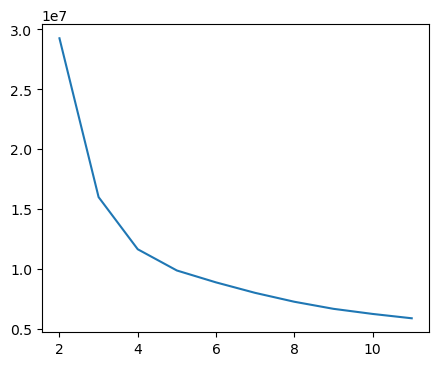

In [19]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(num_k, resultados)
plt.show()

Após algumas analises, resolvi separar em **5 clusters**

In [20]:
# Visualizando a base1
base1.head(3)

,valence,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity
0,0.0594,0.982,0.279,0.211,0,0.878,10,0.665,-20.096,1,4
1,0.9630,0.732,0.819,0.341,0,0.000,7,0.160,-12.441,1,5
2,0.0394,0.961,0.328,0.166,0,0.913,3,0.101,-14.850,1,5


In [21]:
km5 = KMeans(n_clusters=5, n_init=10)    # Criando um KMeans com 5 clusters
kmeans = km5.fit(base1)
base1['Cluster'] = kmeans.labels_        # Criando uma nova coluna na base1, com o resultado
base1.head()

,valence,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,Cluster
0,0.0594,0.982,0.279,0.211,0,0.878000,10,0.665,-20.096,1,4,1
1,0.9630,0.732,0.819,0.341,0,0.000000,7,0.160,-12.441,1,5,1
2,0.0394,0.961,0.328,0.166,0,0.913000,3,0.101,-14.850,1,5,1
3,0.1650,0.967,0.275,0.309,0,0.000028,5,0.381,-9.316,1,3,1
4,0.2530,0.957,0.418,0.193,0,0.000002,3,0.229,-10.096,1,2,1


In [22]:
# Analisando brevemente as correlações entre as colunas numéricas da base
base1.corr()

,valence,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,Cluster
valence,1.000000,-0.184101,0.558946,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.056267
acousticness,-0.184101,1.000000,-0.266852,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.096158
danceability,0.558946,-0.266852,1.000000,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,-0.060676
energy,0.353876,-0.749393,0.221967,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,0.084936
explicit,-0.018613,-0.246007,0.241757,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,-0.150623
instrumentalness,-0.198501,0.329819,-0.278063,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.072769
key,0.028473,-0.020550,0.024439,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,-0.007052
liveness,0.003832,-0.024482,-0.100193,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.016673
loudness,0.313512,-0.561696,0.285057,0.782362,0.140300,-0.408611,0.017385,0.056422,1.000000,-0.010727,0.457051,0.011148
mode,0.015641,0.047168,-0.045956,-0.039260,-0.078872,-0.036543,-0.116260,0.002641,-0.010727,1.000000,-0.028897,0.041411


In [23]:
# Visualizando a quantidade de valores dos clusters
base1.Cluster.value_counts()

1    43488
2    38829
3    36685
4    30650
0    21001
Name: Cluster, dtype: int64

# **Visualizações**

Criando gráficos de caixas, para visualizarmos as distribuições dos valores das colunas, onde o x são os Clusters (0,1,2,3,4) 

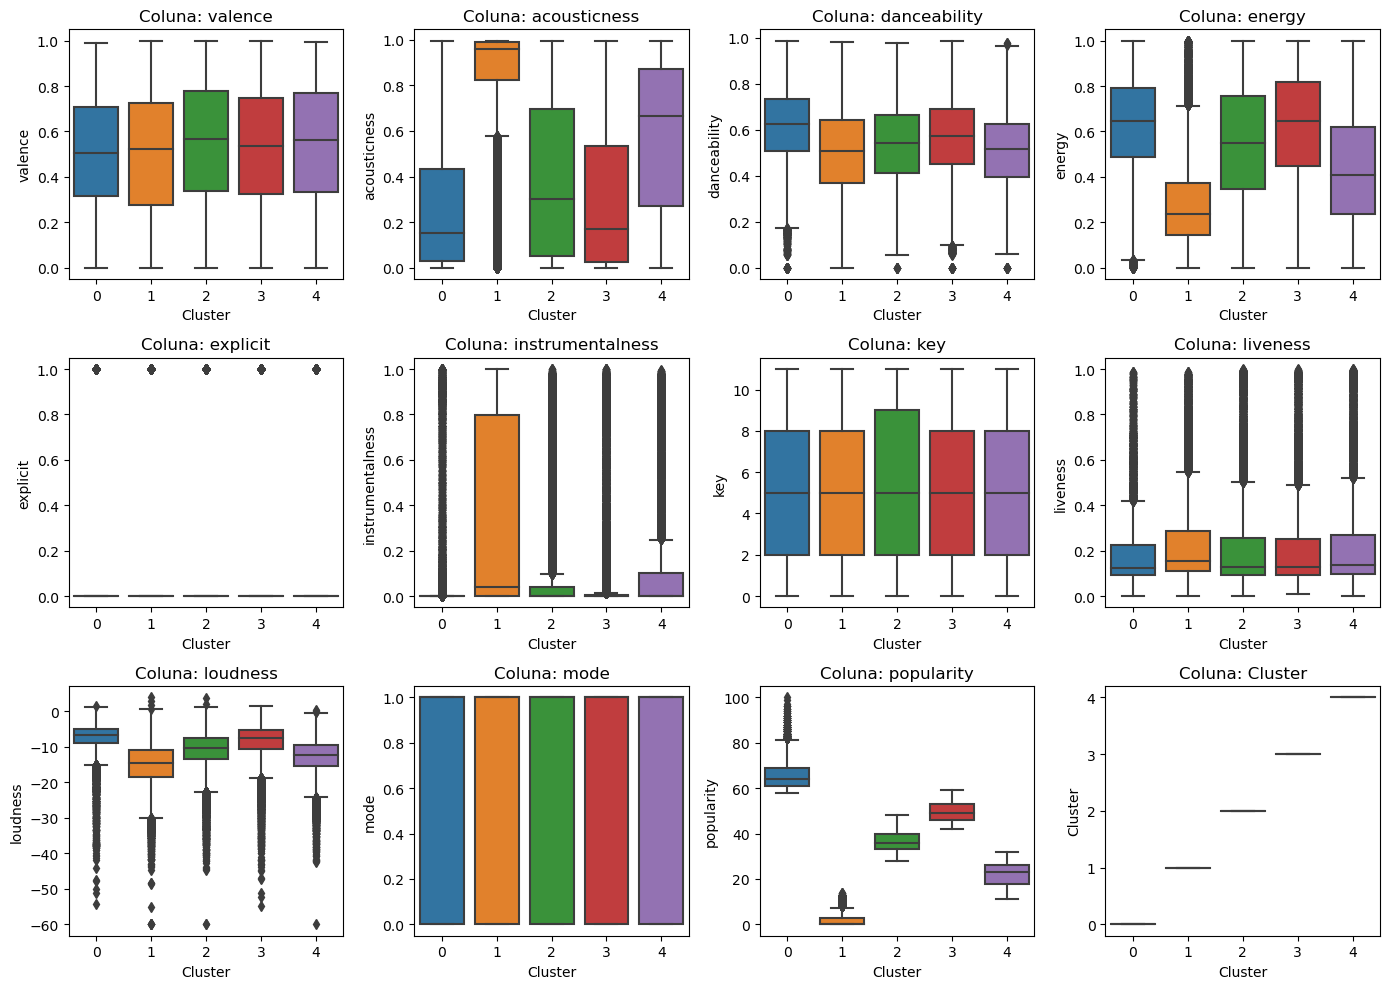

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14,10), tight_layout=True)

for ax,coluna in zip(axes.flatten(),base1):
    sns.boxplot(data=base1, y=coluna, x='Cluster', ax=ax)
    ax.set_title(f"Coluna: {coluna}")
plt.show()

### **Criando uma função que:**
- Colocamos o número de clusters que queremos colocar no KMeans
- Colocamos a base que queremos fazer o fit
- Nos retorna gráficos de caixa com as distribuições das colunas, agrupada pelos clusters


In [25]:
def ver_dados_clusters(n_clusters, base_a):
    
    # Esse laço if elif é basicamente oara variar os valores do "nrows" e "ncols" do matplotlib, para que os subplots seram criados do tamanho ideal
    if base_a.shape[1] >=2 and base_a.shape[1] <5:
        n_rows = 1
        n_cols = base_a.shape[1]
        print('a')
    elif base_a.shape[1] >=5 and base_a.shape[1] <9:
        n_rows = 2
        n_cols = int(base_a.shape[1]/2)    
    elif base_a.shape[1] >=9 and base_a.shape[1] <13:
        n_rows = 3
        n_cols = int(base_a.shape[1]/3)
    elif base_a.shape[1] >=13 and base_a.shape[1] <17:
        n_rows = 4
        n_cols = int(base_a.shape[1]/4)
    elif base_a.shape[1] >=17 and base_a.shape[1] <21:
        n_rows = 5
        n_cols = int(base_a.shape[1]/5)
    
    
    km = KMeans(n_clusters=n_clusters, n_init=10)   # O n_clusters passado na função é colocado no n_clusters do KMeans
    kmeans = km.fit(base_a)                         # Fazendo o fit da base passada
    base_a['Cluster'] = kmeans.labels_              # Criando coluna com os resultados dos clusters
    
    
    # Por fim, criando os gráficos
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14,10), tight_layout=True)

    for ax,coluna in zip(axes.flatten(),base_a):
        sns.boxplot(data=base_a, y=coluna, x='Cluster', ax=ax)
        ax.set_title(f"Coluna: {coluna}")
        ax.xaxis.set_visible(False)
    plt.show()

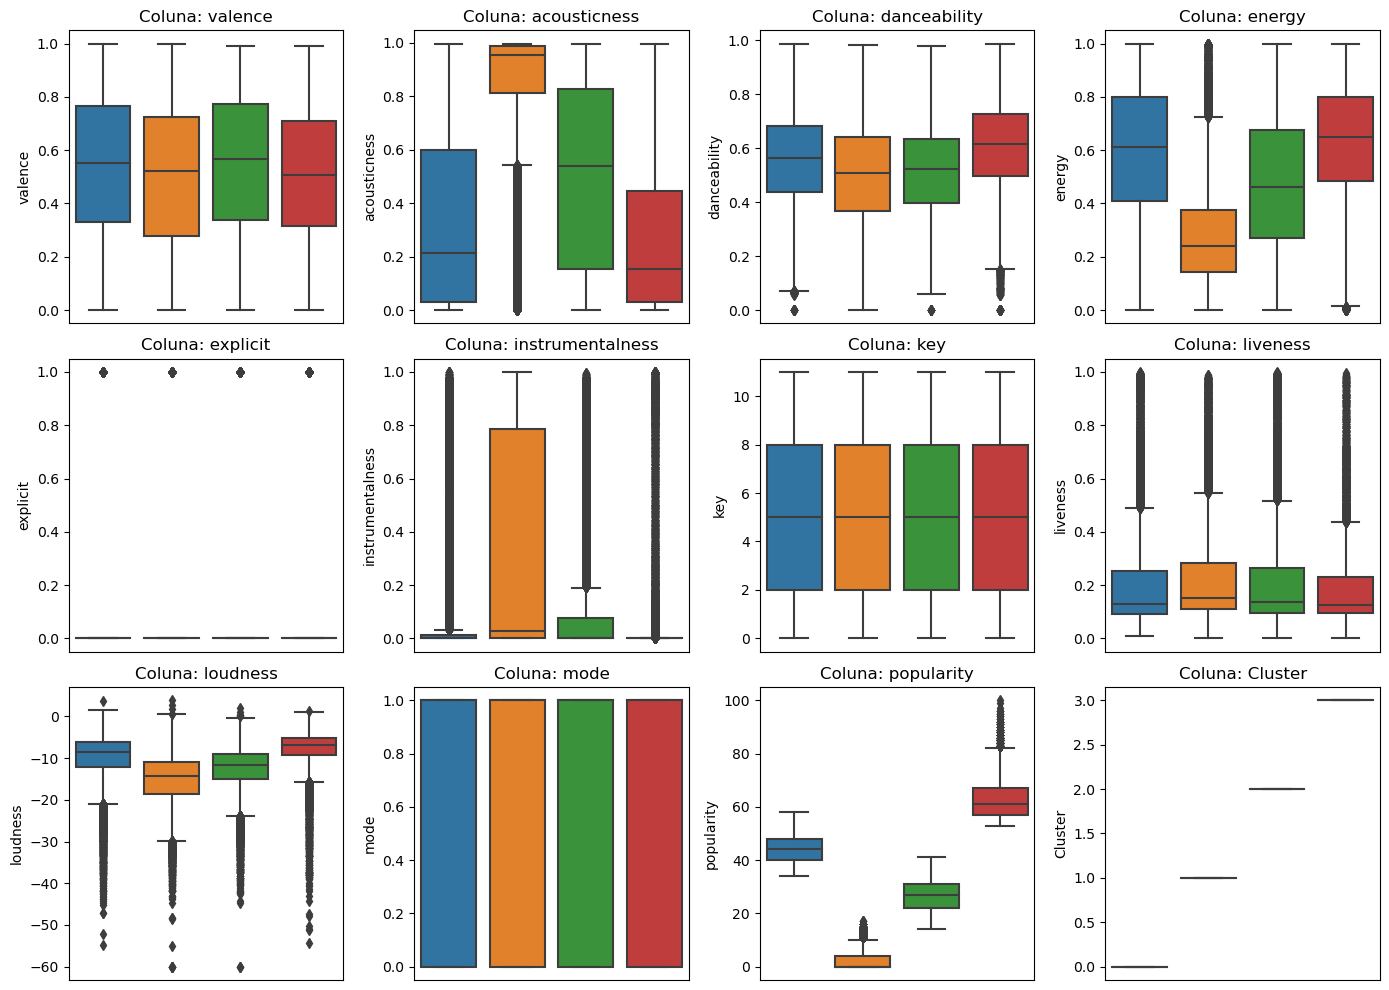

In [26]:
# Usando a função
ver_dados_clusters(4, base1)

**Analisando um gráfico scatter das colunas 'danceability' e 'energy' , com todas as linhas**


(A base em questão possui 5 clusters)

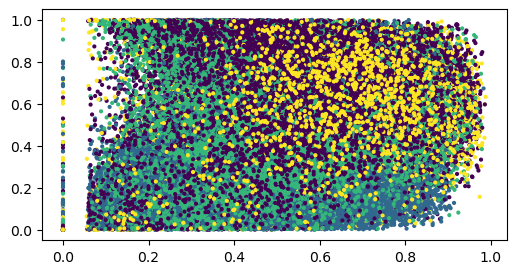

In [27]:
fig,ax=plt.subplots(figsize=(6,3))
ax.scatter(base1.danceability, base1.energy, c=base1['Cluster'],s=4)
plt.show()

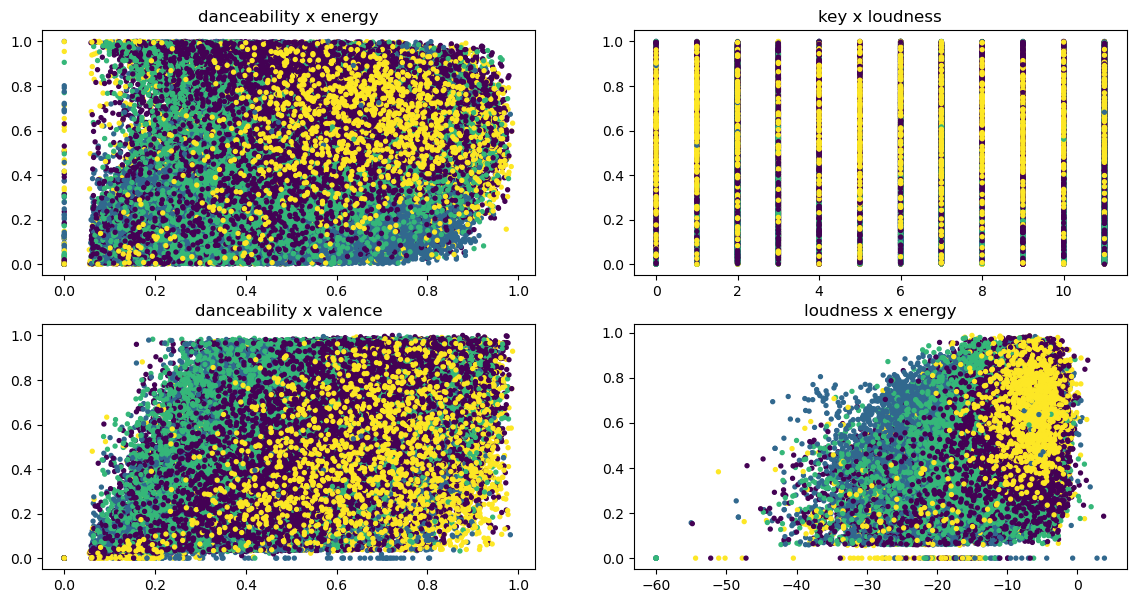

In [28]:
# Visualizando gráficos de dispersão, relacionando 2 colunas diferentes

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(14,7))
ax[0][0].scatter(base1.danceability, base1.energy, c=base1['Cluster'], s=8)
ax[0][0].set_title('danceability x energy')
ax[0][1].scatter(base1.key, base1.energy, c=base1['Cluster'], s=8)
ax[0][1].set_title('key x loudness')
ax[1][0].scatter(base1.danceability, base1.valence, c=base1['Cluster'], s=8)
ax[1][0].set_title('danceability x valence')
ax[1][1].scatter(base1.loudness, base1.danceability, c=base1['Cluster'], s=8)
ax[1][1].set_title('loudness x energy')
plt.show()

In [29]:
# Laço for que retorna o mínimo, máximo, média, mediana e desvio padrão de colunas agrupadas pelos clusters
from pprint import pprint
for coluna in base1:
    print('Coluna: ',coluna)
    pprint(base1.groupby('Cluster')[coluna].agg(['min','max','mean','median','std']))
    print(' ')
    print(' ')

Coluna:  valence
         min    max      mean  median       std
Cluster                                        
0        0.0  1.000  0.543501   0.553  0.262716
1        0.0  1.000  0.503048   0.521  0.268312
2        0.0  0.993  0.549622   0.566  0.264262
3        0.0  0.993  0.511001   0.507  0.248911
 
 
Coluna:  acousticness
         min    max      mean  median       std
Cluster                                        
0        0.0  0.996  0.328498   0.213  0.322514
1        0.0  0.996  0.839535   0.955  0.245148
2        0.0  0.996  0.501518   0.538  0.343725
3        0.0  0.996  0.268772   0.152  0.287782
 
 
Coluna:  danceability
         min    max      mean  median       std
Cluster                                        
0        0.0  0.986  0.554247   0.563  0.174781
1        0.0  0.983  0.500122   0.508  0.176497
2        0.0  0.979  0.514309   0.522  0.167796
3        0.0  0.988  0.602719   0.614  0.167991
 
 
Coluna:  energy
             min  max      mean  median       s

**Analisando 3 colunas em um gráfico interativo**

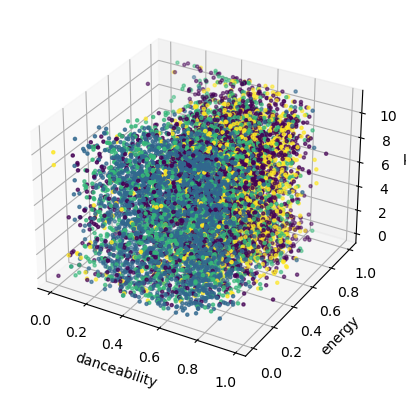

In [30]:
amostra_aleatoria = base1.sample(10000, random_state=0)            # Criando uma amostragem aleatória com 10000 valores
#%matplotlib ipympl                                                # Código para tornar o gráfico interativo
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
centroids = kmeans.cluster_centers_

x = amostra_aleatoria['danceability']                               
y = amostra_aleatoria['energy']                
z = amostra_aleatoria['key']            

ax.set_xlabel('danceability')
ax.set_ylabel('energy')
ax.set_zlabel('key')

ax.scatter(x,y,z, c=amostra_aleatoria['Cluster'],s=5)
plt.show()

### **Agora, criando uma base para transformar esses valores através de funções**

In [31]:
base_nova = base.drop(['artists','id','name','release_date','year','duration_ms'],axis=1)
base_nova.head()

,valence,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,0.982,0.279,0.211,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,0.732,0.819,0.341,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,0.961,0.328,0.166,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,0.967,0.275,0.309,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,0.957,0.418,0.193,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


.

.

.

# **Analisando os dados das colunas detalhadamente**

**valence**: Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma música. Musicas com alta valência soam mais positivas 

In [32]:
def funcao01(valor):
    if valor < 0.20:
        return 0
    elif valor >= 0.20 and valor < 0.40:
        return 1
    elif valor >= 0.40 and valor < 0.60:
        return 2
    elif valor >= 0.60 and valor < 0.80:
        return 3
    elif valor >= 0.80:
        return 4
    else:
        return -1
    
base_nova['valence'] = base_nova['valence'].apply(funcao01)
base_nova['valence'].value_counts()

3    40140
2    39372
1    34696
4    32598
0    23847
Name: valence, dtype: int64

**acousticness**: Classifica se a música é acústica ou não, vai de 0.0 a 1.0, músicas com o valor de Acousticness mais próximo de 1.0 possuem alta certeza que sejam acústicas.

In [33]:
base_nova['acousticness'] = base_nova['acousticness'].apply(funcao01)
base_nova['acousticness'].value_counts()

4    56716
0    56096
3    21523
1    19341
2    16977
Name: acousticness, dtype: int64

**danceability** - Classifica o quão dançante é a música com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral, vai de 0.0 a 1.0

In [34]:
base_nova['danceability'] = base_nova['danceability'].apply(funcao01)
base_nova['danceability'].value_counts()

2    65339
3    56517
1    32823
4    10178
0     5796
Name: danceability, dtype: int64

**energy**: Representa uma medida para avaliação da intensidade e atividade da música, normalmente as músicas mais energéticas parecem rápidas, altas e barulhentas, vai de 0.0 a 1.0, valores de Energy mais próximos de 0,0 significam que a música é mais calma, por exemplo musicas clássicas e valores maís próximo de 1,0 significa que a música é mais agitada, por exemplo Death Metal

In [35]:
base_nova['energy'] = base_nova['energy'].apply(funcao01)
base_nova['energy'].value_counts()

1    40429
2    37934
3    34101
0    31207
4    26982
Name: energy, dtype: int64

**instrumentalness** - Classifica o quanto "instrumental" é a música, músicas totalmente instrumentais não possuem vocais, vocais como “Ooh” e “aah” são tratados como instrumentais neste contexto.

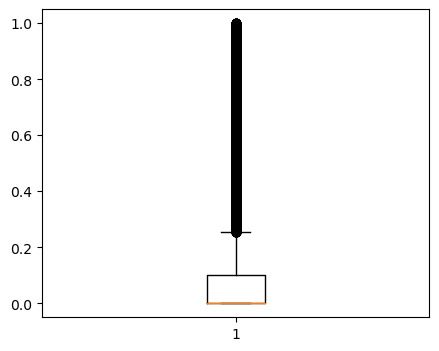

In [36]:
fig, ax = plt.subplots(figsize=(5,4))
ax.boxplot(base['instrumentalness'])
plt.show()

In [37]:
base_nova['instrumentalness'].agg(['mean','min','max','std','median'])

mean      0.167010
min       0.000000
max       1.000000
std       0.313475
median    0.000216
Name: instrumentalness, dtype: float64

In [38]:
base_nova['instrumentalness'].value_counts().head(5)

0.000    46580
0.916      201
0.917      197
0.904      191
0.922      191
Name: instrumentalness, dtype: int64

In [39]:
base_nova['instrumentalness'] = base_nova['instrumentalness'].apply(funcao01)
base_nova['instrumentalness'].value_counts()

0    132690
4     19821
3      7312
1      5840
2      4990
Name: instrumentalness, dtype: int64

A maioria dos valores estão próximos a 0.

**liveness** - Classifica a presença de público na gravação na música. Valores mais altos representam um aumento na certeza da gravação da música ser "ao vivo". Valores acima de 0,8 fornece uma grande certeza de que a música tenha sido gravada "ao vivo".

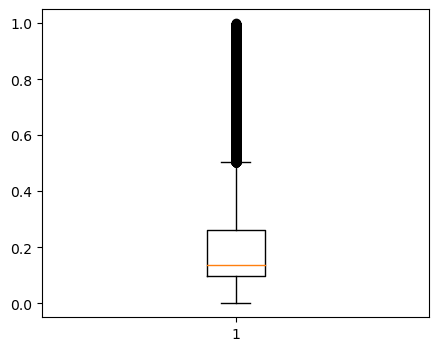

In [40]:
fig, ax = plt.subplots(figsize=(5,4))
ax.boxplot(base_nova['liveness'])
plt.show()

In [41]:
base_nova['liveness'].agg(['mean','min','max','std','median'])

mean      0.205839
min       0.000000
max       1.000000
std       0.174805
median    0.136000
Name: liveness, dtype: float64

In [42]:
base_nova['liveness'].value_counts()

0.11100    1849
0.11000    1663
0.10900    1636
0.10800    1624
0.10700    1553
           ... 
0.00967       1
0.02310       1
0.01010       1
0.01960       1
1.00000       1
Name: liveness, Length: 1740, dtype: int64

In [43]:
base_nova['liveness'] = base_nova['liveness'].apply(funcao01)
base_nova['liveness'].value_counts()

0    113496
1     39768
2      8565
3      5404
4      3420
Name: liveness, dtype: int64

**Speechiness**: A Speechiness detecta a presença de palavras faladas em uma música. Quanto mais exclusivamente falada for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem músicas que provavelmente são compostas inteiramente de Speechiness faladas. Valores entre 0,33 e 0,66 descrevem músicas que podem conter instrumentos e fala, em seções ou em camadas, incluindo casos como música rap.

In [44]:
base_nova['speechiness'].value_counts()

0.0347    580
0.0334    571
0.0328    563
0.0337    561
0.0330    559
         ... 
0.7980      1
0.7240      1
0.7590      1
0.6570      1
0.7290      1
Name: speechiness, Length: 1626, dtype: int64

In [45]:
def funcao_speechiness(x):
    if x < 0.33:
        return 0
    elif x >= 0.33 and x < 0.66:
        return 1
    elif x >= 0.66:
        return 2


In [46]:
base_nova['speechiness'] = base_nova['speechiness'].apply(funcao_speechiness)
base_nova['speechiness'].value_counts()

0    161217
2      4969
1      4467
Name: speechiness, dtype: int64

**Tempo**: O tempo estimado geral de uma música em batidas por minuto (BPM). Na terminologia musical, o tempo é a velocidade ou ritmo de uma determinada parte e deriva diretamente da duração média do tempo.

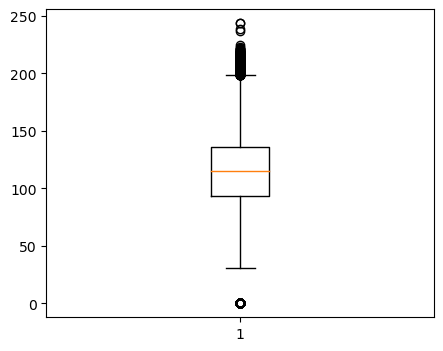

In [47]:
fig, ax = plt.subplots(figsize=(5,4))
ax.boxplot(base_nova['tempo'])
plt.show()

In [48]:
base_nova.tempo.max()

243.507

In [49]:
base_nova['tempo'].value_counts().head(5)

0.000      143
120.000     20
120.012     20
94.997      19
128.005     19
Name: tempo, dtype: int64

In [50]:
def col_tempo(x):
    if x == 0:
        return 0
    elif x < 50:
        return 1
    elif x < 100:
        return 2
    elif x < 150:
        return 3
    elif x < 200:
        return 4
    elif x >= 200:
        return 5

In [51]:
base_nova['tempo'] = base_nova['tempo'].apply(col_tempo)
base_nova['tempo'].value_counts()

3    89473
2    56476
4    23026
5     1320
1      215
0      143
Name: tempo, dtype: int64

In [52]:
base_nova.head(5)

,valence,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0,4,1,1,0,4,10,3,-20.096,1,4,0,2
1,4,3,4,1,0,0,7,0,-12.441,1,5,1,2
2,0,4,1,0,0,4,3,0,-14.850,1,5,0,3
3,0,4,1,1,0,0,5,1,-9.316,1,3,0,3
4,1,4,2,0,0,0,3,1,-10.096,1,2,0,3


**Loudness**: O volume geral de uma música em decibéis (dB). Os valores de intensidade são calculados em toda a música e são úteis para comparar a intensidade relativa das músicas. Loudness é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

In [53]:
base['loudness'].value_counts()

-6.942     27
-7.436     27
-6.664     26
-8.320     26
-11.815    25
           ..
-2.740      1
-33.161     1
-31.808     1
-27.609     1
-35.072     1
Name: loudness, Length: 25410, dtype: int64

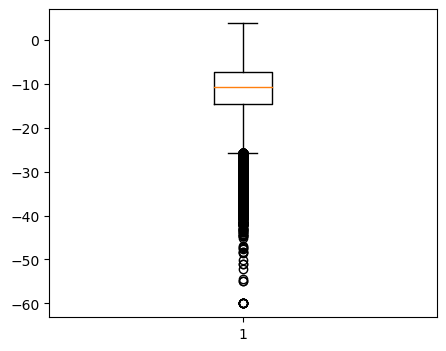

In [54]:
fig, ax = plt.subplots(figsize=(5,4))
ax.boxplot(base_nova['loudness'])
plt.show()

In [55]:
def loudness_valores(x):
    if x < -45:
        return 0
    elif x < -30:
        return 1
    elif x < -15:
        return 2
    elif x >= -15:
        return 3

base_nova.loudness = base_nova.loudness.apply(loudness_valores)
base_nova.loudness.value_counts()

3    130995
2     38351
1      1283
0        24
Name: loudness, dtype: int64

### **Fazendo um mapa de palavras de cada cluster, utilizando os nomes das musicas**
- Assim, conseguimos ver as palavras mais frequentes nas letras das músicas, agrupadas pelos clusters.
- Lembrando que, na clusterização, o KMeans não tem contato com os nomes das músicas, mas sim com os dados relacionados ao som da música em si.

In [56]:
# Visualizando a base "base_nova", após impementarmos os novos valores às colunas com as funções criadas 
base_nova.head(5)

,valence,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0,4,1,1,0,4,10,3,2,1,4,0,2
1,4,3,4,1,0,0,7,0,3,1,5,1,2
2,0,4,1,0,0,4,3,0,3,1,5,0,3
3,0,4,1,1,0,0,5,1,3,1,3,0,3
4,1,4,2,0,0,0,3,1,3,1,2,0,3


In [57]:
base_1 = base_nova.drop(['key','mode','explicit'],axis=1)
base_1.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo
0,0,4,1,1,4,3,2,4,0,2
1,4,3,4,1,0,0,3,5,1,2
2,0,4,1,0,4,0,3,5,0,3
3,0,4,1,1,0,1,3,3,0,3
4,1,4,2,0,0,1,3,2,0,3


In [58]:
# Criando um KMeans com 5 clusters
kmeans5 = KMeans(n_clusters=5, n_init=10, random_state=0)
kmeans5 = kmeans5.fit(base_1)
base_1['Cluster'] = kmeans5.labels_
base_1['Cluster'].value_counts()

1    44086
4    39786
0    36512
2    30957
3    19312
Name: Cluster, dtype: int64

In [59]:
# Laço for para analisarmos valores estatísticos
for i in base_1:
    print(i)
    print(' ')
    print('Média:')
    print(base_1.groupby('Cluster')[i].agg(['min','max','mean','median','std']))
    print(' ')
    print(' ')

valence
 
Média:
         min  max      mean  median       std
Cluster                                      
0          0    4  2.126808     2.0  1.310652
1          0    4  2.022660     2.0  1.343865
2          0    4  2.232710     2.0  1.325395
3          0    4  2.019366     2.0  1.243298
4          0    4  2.244785     2.0  1.320492
 
 
acousticness
 
Média:
         min  max      mean  median       std
Cluster                                      
0          0    4  1.164412     0.0  1.444414
1          0    4  3.501747     4.0  1.079229
2          0    4  2.306037     3.0  1.567520
3          0    4  0.960439     0.0  1.316234
4          0    4  1.455261     1.0  1.541833
 
 
danceability
 
Média:
         min  max      mean  median       std
Cluster                                      
0          0    4  2.325181     2.0  0.913415
1          0    4  2.007667     2.0  0.931612
2          0    4  2.047291     2.0  0.872265
3          0    4  2.569283     3.0  0.883842
4          

In [60]:
# Por fim, criando uma coluna com os nomes das músicas
base_1['nome_musica'] = base.name

In [61]:
base_1.head(3)

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,Cluster,nome_musica
0,0,4,1,1,4,3,2,4,0,2,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ..."
1,4,3,4,1,0,0,3,5,1,2,1,Clancy Lowered the Boom
2,0,4,1,0,4,0,3,5,0,3,1,Gati Bali


**Utilizando os nomes das músicas para vermos as nuvem de palavras**

# **Fazendo a nuvem de palavras da base**

In [62]:
valores_coluna = base_1['nome_musica'].tolist()
musicas = ''.join(map(str, valores_coluna))

In [63]:
from wordcloud import WordCloud                                     # Importando a nuvem de palavras

(-0.5, 399.5, 199.5, -0.5)

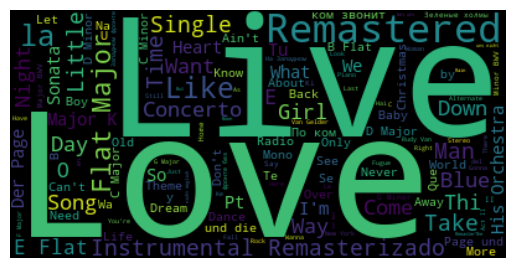

In [64]:
wordcloud = WordCloud(stopwords=['and','or','when','why','the','he','she','it','him','her','they','are','is','am','no','me','feat','to','a','from','for','at','with','that','feat','in','my','i','op','you','up','de','all','of','one','on','will','can','be','make','do','out','good','not','your','go','got','get','mi','i"m', 'el']).generate(musicas)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

### Visualizando a nuvem de palavras dos clusters, para vermos se há relações, ou influências

In [65]:
cluster0 = base_1.loc[base_1.Cluster == 0]
cluster1 = base_1.loc[base_1.Cluster == 1]
cluster2 = base_1.loc[base_1.Cluster == 2]
cluster3 = base_1.loc[base_1.Cluster == 3]
cluster4 = base_1.loc[base_1.Cluster == 4]

valores_coluna0 = cluster0['nome_musica'].tolist()
musicas0 = ''.join(map(str, valores_coluna0))

valores_coluna1 = cluster1['nome_musica'].tolist()
musicas1 = ''.join(map(str, valores_coluna1))

valores_coluna2 = cluster2['nome_musica'].tolist()
musicas2 = ''.join(map(str, valores_coluna2))

valores_coluna3 = cluster3['nome_musica'].tolist()
musicas3 = ''.join(map(str, valores_coluna3))

valores_coluna4 = cluster4['nome_musica'].tolist()
musicas4 = ''.join(map(str, valores_coluna4))

(-0.5, 399.5, 199.5, -0.5)

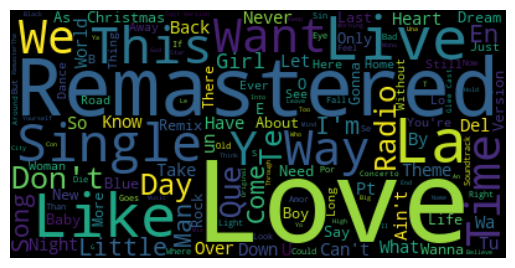

In [66]:
wordcloud = WordCloud(stopwords=['and','or','when','why','the','he','she','it','him','her','they','are','is','am','no','me','feat','to','a','from','for','at','with','that','feat','in','my','i','op','you','up','de','all','of','one','on','will','can','be','make','do','out','good','not','your','go','got','get','mi','i"m', 'el']).generate(musicas0)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

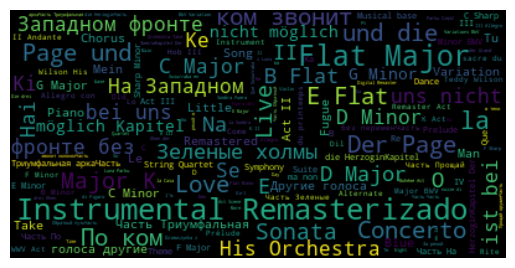

In [67]:
wordcloud = WordCloud(stopwords=['and','or','when','why','the','he','she','it','him','her','they','are','is','am','no','me','feat','to','a','from','for','at','with','that','feat','in','my','i','op','you','up','de','all','of','one','on','will','can','be','make','do','out','good','not','your','go','got','get','mi','i"m', 'el']).generate(musicas1)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

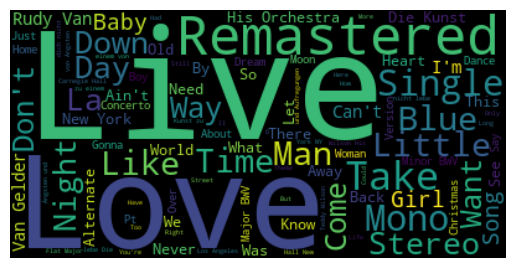

In [68]:
wordcloud = WordCloud(stopwords=['and','or','when','why','the','he','she','it','him','her','they','are','is','am','no','me','feat','to','a','from','for','at','with','that','feat','in','my','i','op','you','up','de','all','of','one','on','will','can','be','make','do','out','good','not','your','go','got','get','mi','i"m', 'el']).generate(musicas2)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

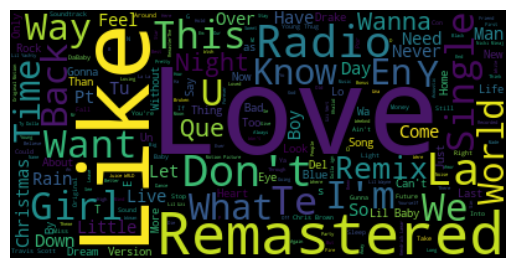

In [69]:
wordcloud = WordCloud(stopwords=['and','or','when','why','the','he','she','it','him','her','they','are','is','am','no','me','feat','to','a','from','for','at','with','that','feat','in','my','i','op','you','up','de','all','of','one','on','will','can','be','make','do','out','good','not','your','go','got','get','mi','i"m', 'el']).generate(musicas3)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

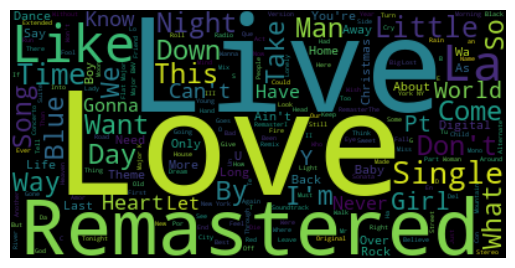

In [70]:
wordcloud = WordCloud(stopwords=['and','or','when','why','the','he','she','it','him','her','they','are','is','am','no','me','feat','to','a','from','for','at','with','that','feat','in','my','i','op','you','up','de','all','of','one','on','will','can','be','make','do','out','good','not','your','go','got','get','mi','i"m', 'el']).generate(musicas4)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

Como podemos ver, em alguns clusters as nuvens de palavras variam muito, mudando as palavras mais frequêntes. Há um cluster que aparecem muitas palavras relacionadas a concertos musicais, outros que aparecem a músicas tocadas ao vivo, outros  com palavras relacionadas a amor, dentre outras situações.

# Analisando brevemente a popularidade (explorarei mais afundo nos outros notebooks)

**Classificando a popularidade em classes**

In [71]:
base_1.columns

Index(['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'Cluster',
       'nome_musica'],
      dtype='object')

**Visualizando a média das colunas baseado nas escalas de popularidade que fiz anteriormente**
- 0: Menor que 50
- 1: Entre 50 e 99
- 2: Entre 100 e 149
- 3: Entre 150 e 199
- 4: Maior que 200 

In [72]:
base_1.popularity.min()
base_1.popularity.max()

100

In [73]:
def popularidade(x):
    if x < 20:
        return 0 
    elif x < 40:
        return 1
    elif x < 60:
        return 2
    elif x < 80:
        return 3
    elif x >= 80:
        return 4

In [74]:
base_1.popularity = base.popularity.apply(popularidade)

In [75]:
base_visualizar = base_1.drop("nome_musica",axis=1)

In [76]:
base_visualizar.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,Cluster
0,0,4,1,1,4,3,2,0,0,2,1
1,4,3,4,1,0,0,3,0,1,2,1
2,0,4,1,0,4,0,3,0,0,3,1
3,0,4,1,1,0,1,3,0,0,3,1
4,1,4,2,0,0,1,3,0,0,3,1


# **Média das colunas agrupadas com popularidade**

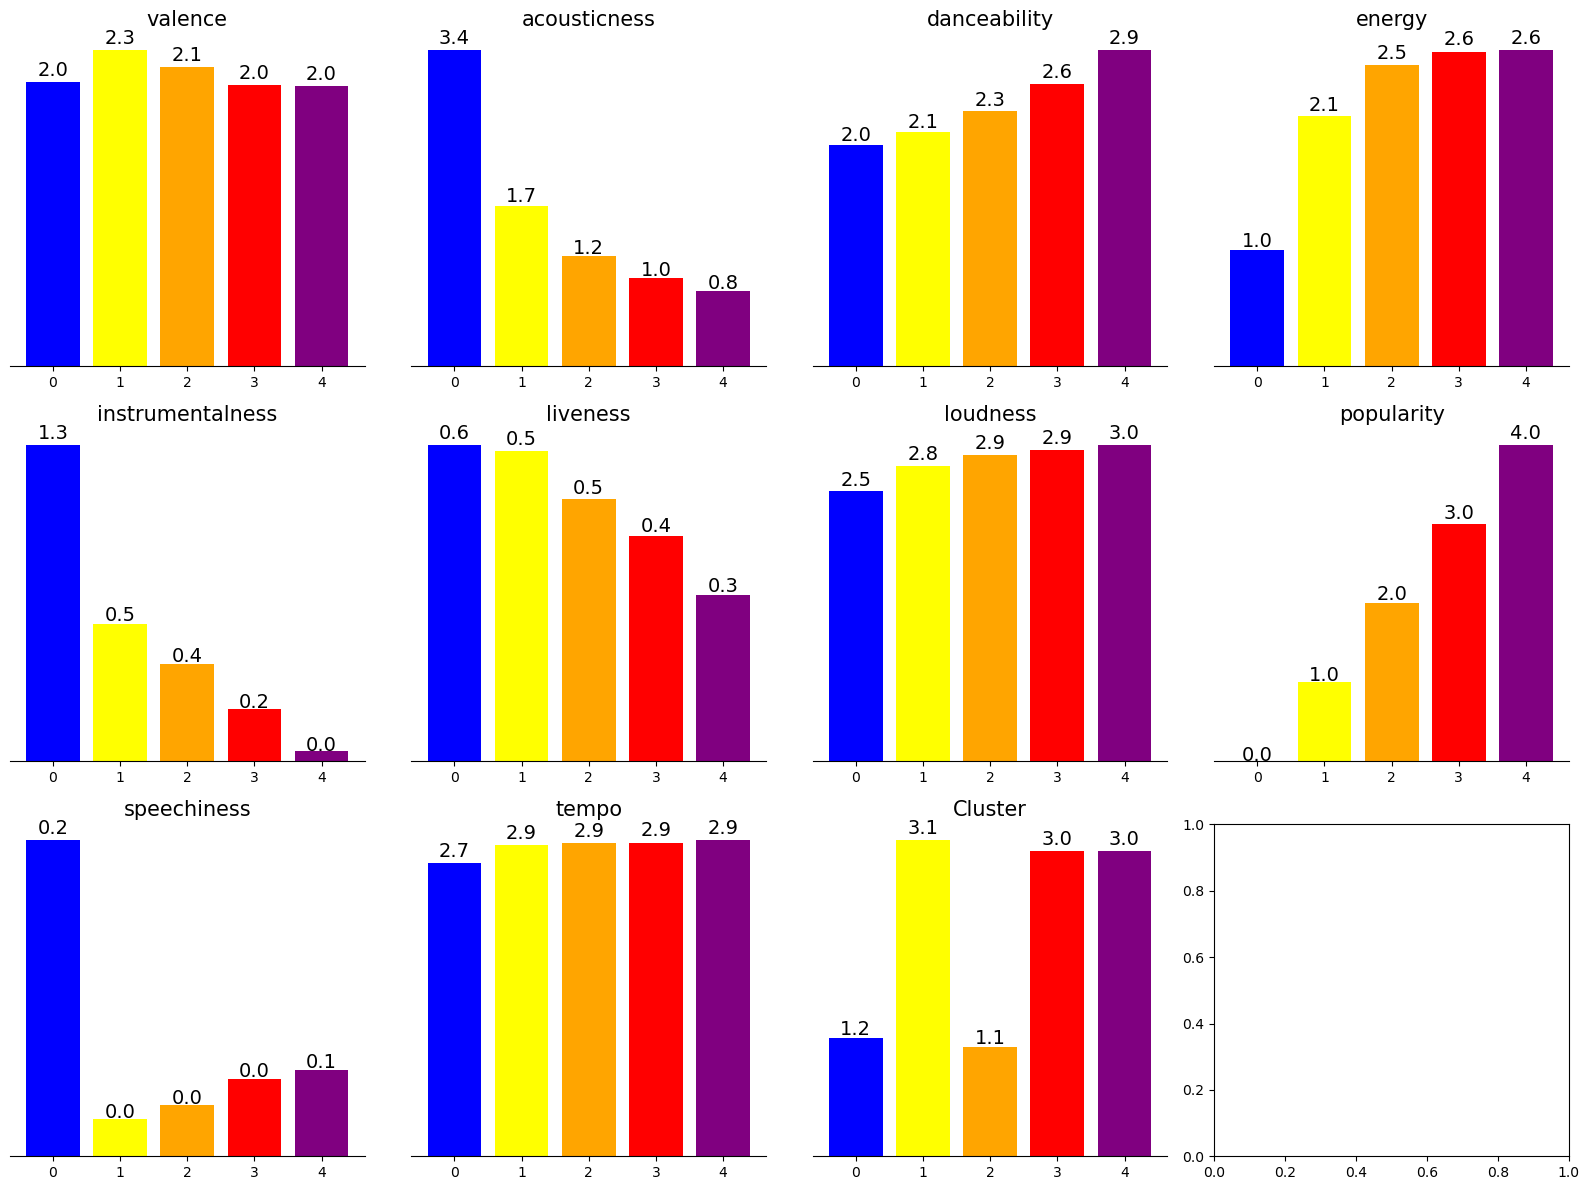

In [78]:
fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(16,12), tight_layout=True)
cores = ['blue','yellow','orange','red','purple'] 
for ax,i in zip(axes.flatten(),base_visualizar):
    a = base_visualizar.groupby('popularity')[i].mean()                
    ax.bar(a.index, a.values, axes=ax, color=cores)
    ax.set_title(i, fontsize=15)
    for i in a.index:
        if len(a.index) < 10:
            ax.annotate(round(a.values[i],1),(a.index[i],a.values[i]+a.values[i]*0.02),ha='center', fontsize=14)
    ax.yaxis.set_visible(False)
    ax.spines[['top','left','right']].set_visible(False)
plt.show()

### Analisando os gráficos gerados acima, podemos tirar algumas conclusões:
- Na coluna **"instrumentalness"** os valores **tendem a cair** conforme a classe de **popularidade aumenta**
- Na coluna **"acoustcness"** os valores **tendem a cair** conforme a classe de **popularidade aumenta**
- Na coluna **"danceability"** os valores **tendem a aumentar** conforme a classe de **popularidade aumenta**
- Na coluna **"energy"** os valores **tendem a aumentar** conforme a classe de **popularidade aumenta**

**Conclusão:** Neste notebook explorei as colunas e utlizei ferramentas e bibliotecas para explorá-las. No próximo notebook, utlizarei a nuvem de palavras mais afundo, para detectar possíveis relações de palavras com valores de colunas, como popularidade, dentre outrass.